<a href="https://colab.research.google.com/github/onishchenkoar/dungeons-and-dragons-and-probability/blob/main/Critical_Role_E71_Vorugal_Roll_for_the_Gate_scroll.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Critical Role E71: Vorugal. Roll for the Gate scroll

There is [a scene](https://youtu.be/-I_tnzBKSWk?t=8507) in episode 71 of Critical Role, where Scanlan has to summon a [goristro](https://criticalrole.fandom.com/wiki/Goristro) using a Gate scroll. The Dungeon master forces a player to roll a charisma (Scanlan's spellcasting stat) check against difficulty class of 19. This is a tense moment, because the goristro is crucial to their plan and they only have one shot at it. Scanlan rolls 20, and everyone is relieved.

What is interesting to me is how to everyone (including me) it felt like Scanlan has pulled it off by the skin of his teeth. Here is a short snippet of code that estimates the odds of succeeding on a d20 roll with advantage + d12 from Inspiration + a modifier of 8. 

Probability of a successful roll: 0.940625
Expected value of the roll 28.325



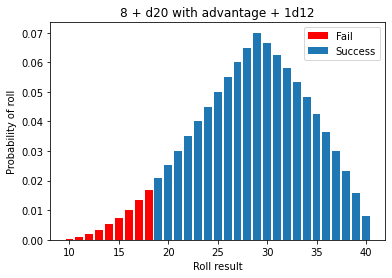

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

# d20 with advantage + 1d12
freqs = np.convolve([(2*i - 1) / 400 for i in range(1, 21)], [1/12] * 12)
# 2-32 is the range of (d20 with advantage + 1d12), 8 is a modifier
roll_range = np.arange(2, 33) + 8
fail = np.where(roll_range < 19)
success = np.where(roll_range >= 19)

plt.bar(roll_range[fail], freqs[fail], color='red', label='Fail')
plt.bar(roll_range[success], freqs[success], label='Success')
plt.title('8 + d20 with advantage + 1d12')
plt.xlabel('Roll result')
plt.ylabel('Probability of roll')
plt.legend()
plt.savefig('distr.png')
print('Probability of a successful roll:', sum(freqs[success]))
print('Expected value of the roll', np.dot(roll_range, freqs))
print()

Well, there we go. Or I can represent it differently.

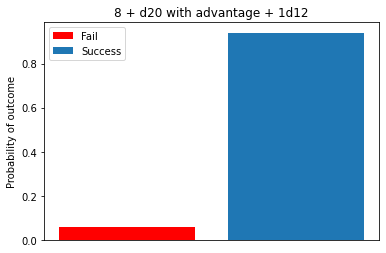

In [ ]:
plt.bar([1,], [0.06,], color='red', label='Fail')
plt.bar([2,], [0.94,], label='Success')
plt.legend()
plt.xticks([])
plt.title('8 + d20 with advantage + 1d12')
plt.ylabel('Probability of outcome')
plt.show()

With 94% probability of succeeding, this is almost the same as rolling d20 where you succeed on every number except 1. Which is not that scary. 